### Lab 3

#### Section: 1 PM
#### Group: 15

#### Name: Victor Fonseca
#### UT EID: VRF262

#### Name: Nibhan Akbar
#### UT EID: na26287

#### Name: Raul Denicolas
#### UT EID: rd32483

#### Name: Arianna Zhao
#### UT EID: axz83

#### Date: 9/15/2023


In [ ]:
# import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly as px

##### Now load the data file _Aid_Data.xlsx_ into a Pandas object

In [ ]:
# read the data file
df = pd.read_excel ('Aid_Data.xlsx')

In [ ]:
#Size
df.shape

(499, 7)

In [ ]:
#Type of dataset
df.head(5)

,aiddata_id,year,donor,recipient,commitment_amount_usd_constant,coalesced_purpose_code,coalesced_purpose_name
0,3002660,2008,Estonia,Moldova,26344.3,31210,Forestry policy and administrative management
1,3004433,2007,Thailand,Laos,3485.9,11420,Higher education
2,8448267,1991,Finland,Philippines,141173.0,43010,Multisector aid
3,8672056,1992,Sweden,Mozambique,214396.0,16020,Employment policy and admin. mgmt.
4,8777452,1992,Canada,Bhutan,290776.0,43010,Multisector aid


In [ ]:
#Find Unique values for each nominal attribute
print(df.donor.unique().size, df.recipient.unique().size, df.coalesced_purpose_name.unique().size)

25 129 135


In [ ]:
#Find min/max of discrete and continuous attributes
print("Attribute: min, max")
print("Aid ID:", df.aiddata_id.min(), df.aiddata_id.max() )
print("Year:", df.year.min(), df.year.max() )
print("commitment_amount_usd_constant:", df.commitment_amount_usd_constant.min(), df.commitment_amount_usd_constant.max() )
print("coalesced_purpose_code:", df.coalesced_purpose_code.min(), df.coalesced_purpose_code.max() )

Attribute: min, max
Aid ID: 3002660 98755850
Year: 1991 2010
commitment_amount_usd_constant: 0.152847 101905000.0
coalesced_purpose_code: 11110 99820


In [ ]:
#Check for missing data
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print(" ")

aiddata_id
False    499
Name: aiddata_id, dtype: int64
 
year
False    499
Name: year, dtype: int64
 
donor
False    499
Name: donor, dtype: int64
 
recipient
False    499
Name: recipient, dtype: int64
 
commitment_amount_usd_constant
False    499
Name: commitment_amount_usd_constant, dtype: int64
 
coalesced_purpose_code
False    499
Name: coalesced_purpose_code, dtype: int64
 
coalesced_purpose_name
False    499
Name: coalesced_purpose_name, dtype: int64
 


In [ ]:
#Check for duplicates
df.duplicated().value_counts()

False    499
dtype: int64

In [ ]:
df_2009 = df.query('year==2009')
df_2009.head(10)

,aiddata_id,year,donor,recipient,commitment_amount_usd_constant,coalesced_purpose_code,coalesced_purpose_name
264,50001341,2009,Spain,Bolivia,7241.33,16061,Culture and recreation
265,50001893,2009,United States,Zimbabwe,750000.00,72010,Material relief assistance and services
266,50002050,2009,Spain,Guinea-Bissau,44562.00,15110,Economic and development policy/planning
267,50005703,2009,Austria,Uganda,20888.50,11330,Vocational training
268,50005778,2009,Austria,"Africa, regional",5974.79,11110,Education policy & admin. management
269,50006415,2009,Belgium,South Africa,139522.00,99810,Sectors not specified
270,50006855,2009,Belgium,"Congo, Dem. Rep.",115955.00,31182,Agricultural research
271,50013154,2009,France,Laos,254115.00,41010,Environmental policy and admin. mgmt
272,50013889,2009,Germany,Bosnia-Herzegovina,1531.21,11420,Higher education
273,50015578,2009,Germany,Ethiopia,3495.33,23030,Power generation/renewable sources


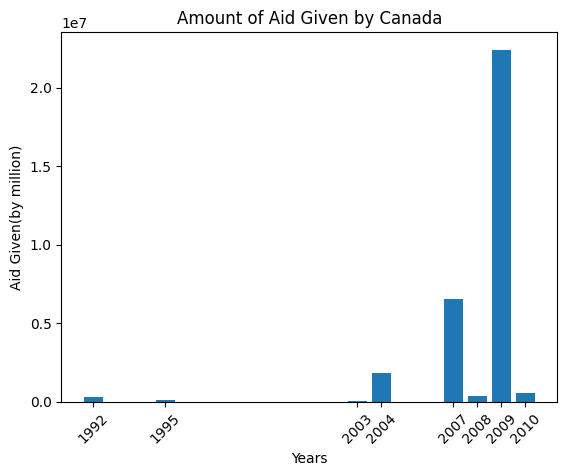

In [ ]:
df_canada = df[(df["donor"]=="Canada")]
yearly=df_canada.groupby("year")["commitment_amount_usd_constant"].sum().reset_index()

plt.bar(yearly["year"], yearly["commitment_amount_usd_constant"])
plt.xticks(yearly["year"], rotation=45)
plt.xlabel("Years")
plt.ylabel("Aid Given(by million)")
plt.title("Amount of Aid Given by Canada")
plt.show()


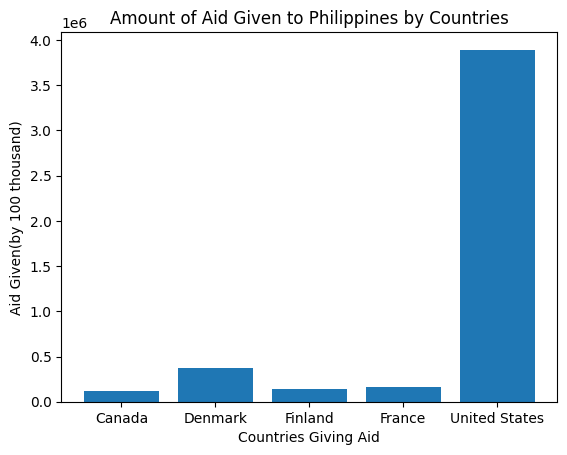

In [ ]:
df_phil = df[(df["recipient"]=="Philippines")]
donors=df_phil.groupby("donor")["commitment_amount_usd_constant"].sum().reset_index()

plt.bar(donors["donor"], donors["commitment_amount_usd_constant"])
plt.xticks(donors["donor"])
plt.xlabel("Countries Giving Aid")
plt.ylabel("Aid Given(by 100 thousand)")
plt.title("Amount of Aid Given to Philippines by Countries")
plt.show()